In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:

df = pd.read_excel("water consumption.xlsx") 

In [3]:
display(df.shape)
display(df.info())
display(df.describe())
display(df.head())



(858381, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858381 entries, 0 to 858380
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         858381 non-null  int64 
 1   Period       858381 non-null  int64 
 2   Mem No       858381 non-null  int64 
 3   Consumption  858381 non-null  int64 
 4   AreaNo       858381 non-null  int64 
 5   AreaName     858381 non-null  object
 6   Type         858381 non-null  object
dtypes: int64(5), object(2)
memory usage: 45.8+ MB


None

,Year,Period,Mem No,Consumption,AreaNo
count,858381.000000,858381.000000,858381.000000,858381.000000,858381.000000
mean,2019.067806,610.709573,30583.781080,25.846828,14.953655
std,1.411718,345.191534,26741.165228,126.493491,8.936019
min,2017.000000,102.000000,1.000000,0.000000,1.000000
25%,2018.000000,304.000000,10081.000000,7.000000,11.000000
50%,2019.000000,708.000000,18589.000000,16.000000,13.000000
75%,2020.000000,910.000000,62613.000000,28.000000,17.000000
max,2021.000000,1112.000000,87300.000000,20856.000000,35.000000


,Year,Period,Mem No,Consumption,AreaNo,AreaName,Type
0,2017,102,1,26,1,Ramallah/ Altyreh,commercial
1,2017,304,1,12,1,Ramallah/ Altyreh,commercial
2,2017,506,1,12,1,Ramallah/ Altyreh,commercial
3,2017,708,1,12,1,Ramallah/ Altyreh,commercial
4,2017,910,1,11,1,Ramallah/ Altyreh,commercial


In [4]:
print(df.isnull().sum())


Year           0
Period         0
Mem No         0
Consumption    0
AreaNo         0
AreaName       0
Type           0
dtype: int64


In [5]:
df['Period'] = df['Period'].astype(str).str.zfill(4)  # ensure 4-digit string
df['Month'] = df['Period'].str[:2]  # extract month start (e.g., '01' from '0102')
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'], format='%Y%m')




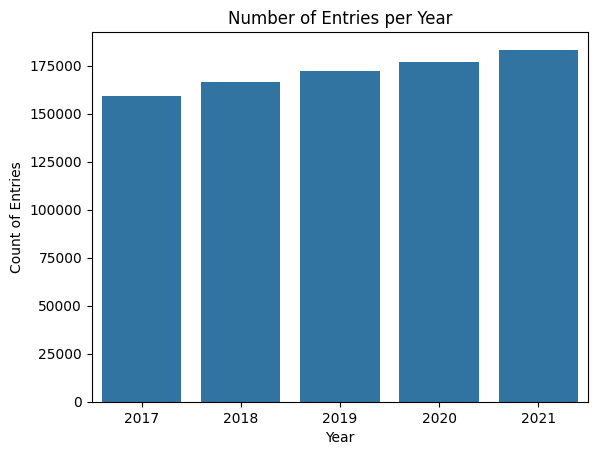

In [6]:

sns.countplot(data=df, x='Year')
plt.title("Number of Entries per Year")
plt.xlabel("Year")
plt.ylabel("Count of Entries")
plt.show()


The chart shows a steady increase in entries from 15,000 in 2017 to over 17,000 in 2021.

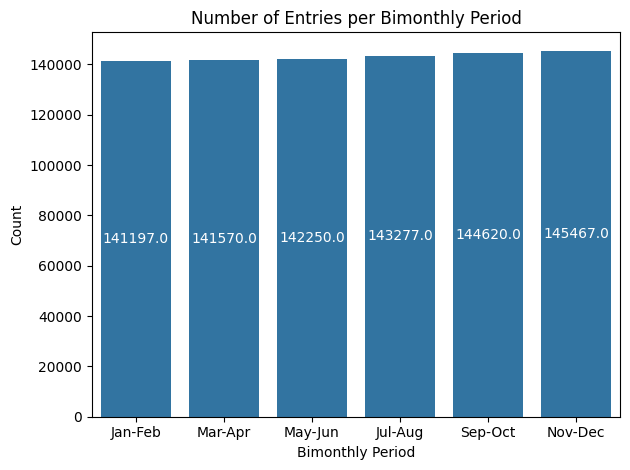

In [7]:


# Mapping and relabeling
period_map = {
    '0102': 'Jan-Feb',
    '0304': 'Mar-Apr',
    '0506': 'May-Jun',
    '0708': 'Jul-Aug',
    '0910': 'Sep-Oct',
    '1112': 'Nov-Dec'
}
df['Period_Label'] = df['Period'].map(period_map)

# Count and order
order = list(period_map.values())
plot = sns.countplot(data=df, x='Period_Label', order=order)
plt.title("Number of Entries per Bimonthly Period")
plt.xlabel("Bimonthly Period")
plt.ylabel("Count")

# Annotate bars
for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'{height}', 
                  (p.get_x() + p.get_width() / 2, height/2),  # x, y position
                  ha='center', va='center', fontsize=10, color='White')

plt.tight_layout()
plt.show()


The chart "Number of Entries per Bimonthly Period" shows a consistent increase in entries throughout the year, with the count rising from 141,197 in Jan-Feb to 145,467 in Nov-Dec.

13
[ 1  4 13 14 11 17 16 10 15  8 12 35 32]
AreaNo
1     102122
4      25683
8       3139
10     31592
11     78260
12     36997
13    166942
14     42007
15     67028
16     70620
17     96844
32    118318
35     18829
Name: count, dtype: int64


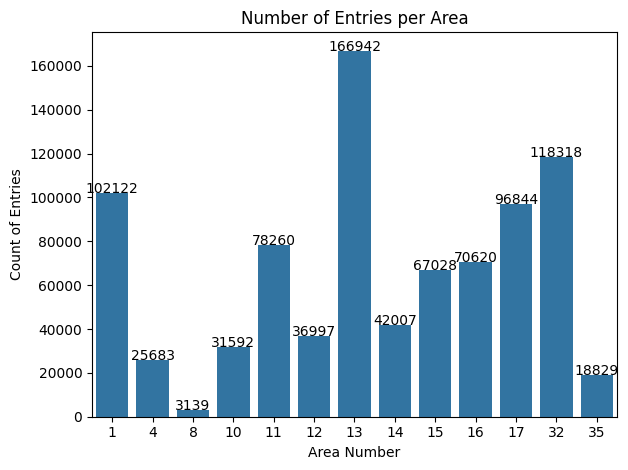

In [8]:
print(df['AreaNo'].nunique())
print(df['AreaNo'].unique())
print(df['AreaNo'].value_counts().sort_index())


# Count entries per AreaNo
area_counts = df['AreaNo'].value_counts().sort_index()

# Plot
plot = sns.barplot(x=area_counts.index, y=area_counts.values)
plt.title("Number of Entries per Area")
plt.xlabel("Area Number")
plt.ylabel("Count of Entries")

# Annotate bars
for i, v in enumerate(area_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.show()


The chart "Number of Entries per Area" shows significant variation, with Area 12 having the highest count at 166,942 entries, while Areas 1, 4, 8, and 35 have much lower counts, ranging from 18,829 to 31,39.

8
['Ramallah/ Altyreh' 'Albireh' 'Ramallah & Albireh ' 'Albireh ' 'Ramallah'
 'Qadora Camp' 'Albireh / Sheab Kasab ' 'Albireh/ um Asharayet']
AreaName
Albireh                   124303
Albireh                   112627
Albireh / Sheab Kasab      18829
Albireh/ um Asharayet     118318
Qadora Camp                 3139
Ramallah                  212101
Ramallah & Albireh        166942
Ramallah/ Altyreh         102122
Name: count, dtype: int64


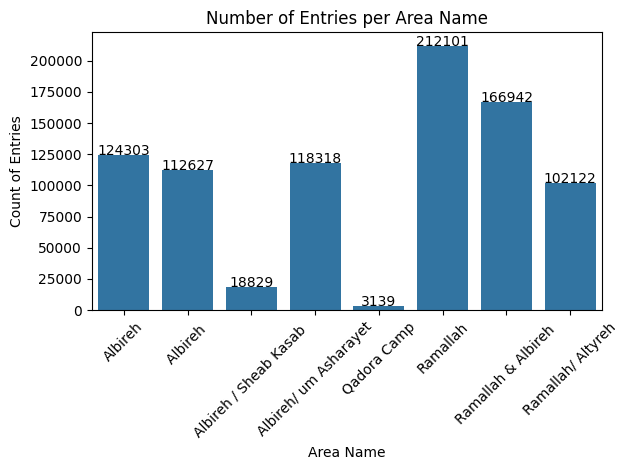

In [9]:
print(df['AreaName'].nunique())
print(df['AreaName'].unique())
area_counts = df['AreaName'].value_counts().sort_index()
print(area_counts)

# Plot
plot = sns.barplot(x=area_counts.index, y=area_counts.values)
plt.title("Number of Entries per Area Name")
plt.xlabel("Area Name")
plt.ylabel("Count of Entries")
plt.xticks(rotation=45)  # Rotate x-labels if area names are long

# Annotate bars with counts
for i, v in enumerate(area_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.show()


The chart "Number of Entries per Area Name" shows significant variation, with Ramallah & Ramallah having the highest count at 212,101 entries, while Albireh / Sheab / Kasab and Qdorayt Camp have the lowest at 18,829 and 31,39 entries respectively.

['commercial' 'مؤسسات عامة' 'home' 'Temp.' 'سياحي' 'صناعي' 'شركة بيتي']
Type
home           727340
commercial     114278
مؤسسات عامة      7519
Temp.            4681
صناعي            2782
سياحي            1768
شركة بيتي          13
Name: count, dtype: int64


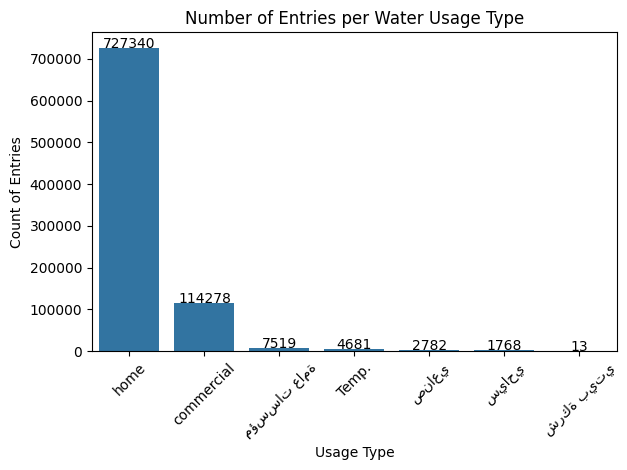

In [10]:
print(df['Type'].unique())
print(df['Type'].value_counts())

# Count values
type_counts = df['Type'].value_counts()

# Plot
plot = sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Number of Entries per Water Usage Type")
plt.xlabel("Usage Type")
plt.ylabel("Count of Entries")
plt.xticks(rotation=45)  # Rotate x-labels if area names are long
# Annotate bars
for i, v in enumerate(type_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.show()


The chart "Number of Entries per Water Usage Type" shows that "home" has the highest count at 727,340 entries, while "commercial" follows with 114,278, and other types like "Temp" and "ؤصـنع" have significantly lower counts, with "ؤصـنع" at just 13 entries.

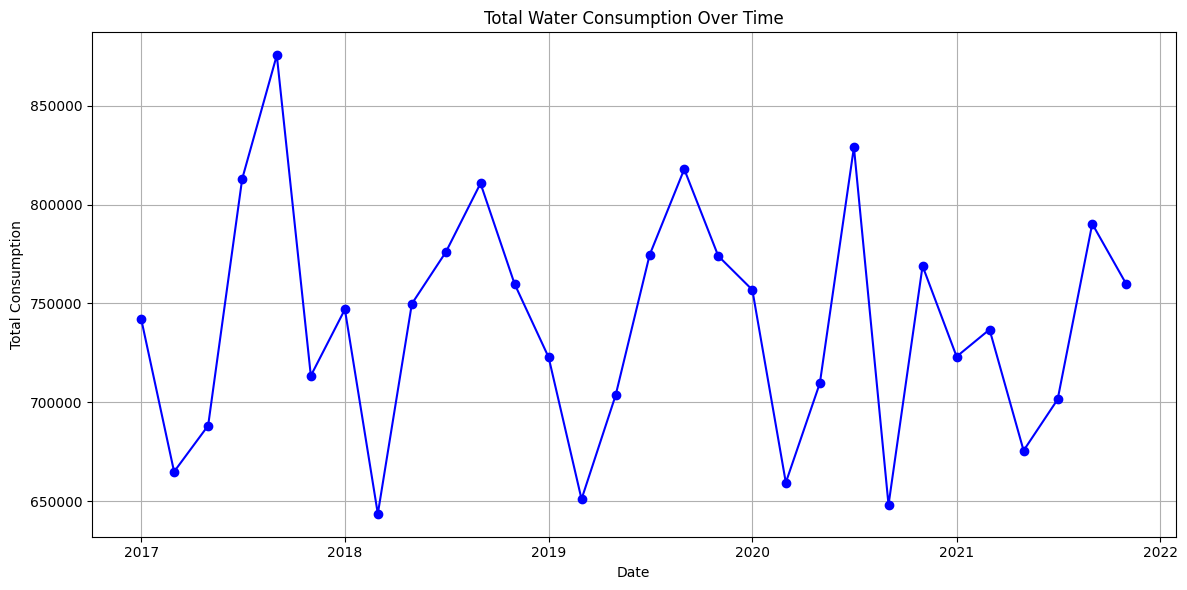

In [11]:

# Assuming 'df' is your original DataFrame with a 'Date' and 'Consumption' column
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is datetime type
df_grouped = df.groupby('Date')['Consumption'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='blue')
plt.title('Total Water Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()


The chart "Total Water Consumption Over Time" shows fluctuating water usage from 2017 to 2022, with peaks around 2017, 2019, and 2021, and a general trend of recovery toward 850,000 in 2022 after a dip in 2018 and 2020.

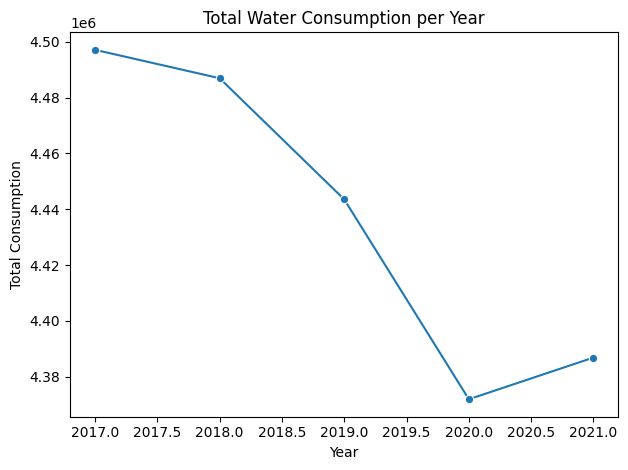

In [12]:

# Group by Year
yearly_total = df.groupby('Year')['Consumption'].sum().reset_index()

# Plot as line chart
sns.lineplot(data=yearly_total, x='Year', y='Consumption', marker='o')
plt.title("Total Water Consumption per Year")
plt.ylabel("Total Consumption")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


The chart "Total Water Consumption per Year" shows a declining trend from 4.50 million units in mid-2017 to a low of 4.38 million units in mid-2020, followed by a slight recovery to 4.40 million units by mid-2021.

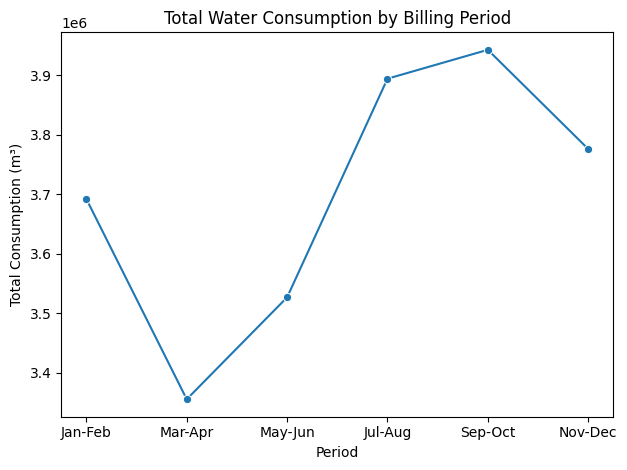

In [13]:
#  Mapping and relabeling
period_map = {
    '0102': 'Jan-Feb',
    '0304': 'Mar-Apr',
    '0506': 'May-Jun',
    '0708': 'Jul-Aug',
    '0910': 'Sep-Oct',
    '1112': 'Nov-Dec'
}
df['Period_Label'] = df['Period'].astype(str).map(period_map)  # ensure Period is string

# Group by Period_Label
period_total = df.groupby('Period_Label')['Consumption'].sum().reset_index()

# Optional: set period order for correct plotting
ordered_labels = ['Jan-Feb', 'Mar-Apr', 'May-Jun', 'Jul-Aug', 'Sep-Oct', 'Nov-Dec']
period_total['Period_Label'] = pd.Categorical(period_total['Period_Label'], categories=ordered_labels, ordered=True)
period_total = period_total.sort_values('Period_Label')

# Plot
sns.lineplot(data=period_total, x='Period_Label', y='Consumption', marker='o')
plt.title("Total Water Consumption by Billing Period")
plt.xlabel("Period")
plt.ylabel("Total Consumption (m³)")

plt.tight_layout()
plt.show()


The chart "Total Water Consumption by Billing Period" shows a decline from 3.7 million cubic meters in Jan-Feb to 3.4 million in Mar-Apr, followed by a rise to 3.9 million in Jul-Aug, and a slight drop to 3.8 million by Nov-Dec.

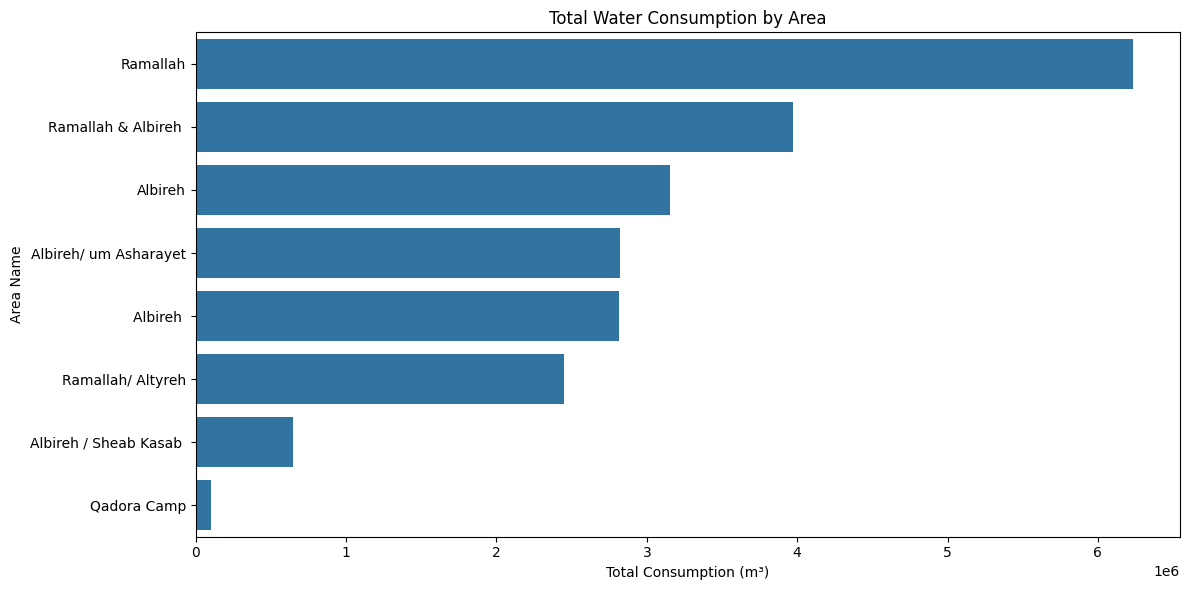

In [14]:

# Group by AreaName
area_total = df.groupby('AreaName')['Consumption'].sum().reset_index().sort_values('Consumption', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=area_total, x='Consumption', y='AreaName')
plt.title("Total Water Consumption by Area")
plt.xlabel("Total Consumption (m³)")
plt.ylabel("Area Name")

plt.tight_layout()
plt.show()


The chart "Total Water Consumption by Area" shows Ramallah with the highest consumption at over 6 million cubic meters, while Qadora Camp has the lowest at less than 1 million, with other areas like Albireh and Ramallah & Albireh showing moderate to high usage.

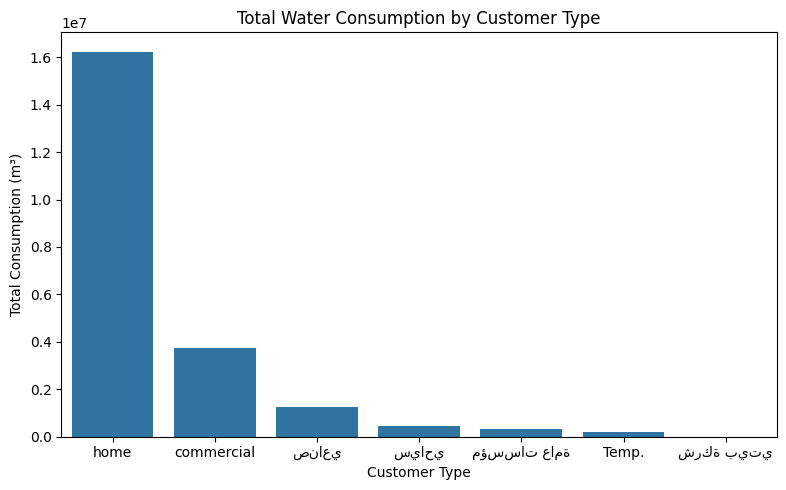

In [15]:

# Group by Type
type_total = df.groupby('Type')['Consumption'].sum().reset_index().sort_values('Consumption', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=type_total, x='Type', y='Consumption')
plt.title("Total Water Consumption by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Consumption (m³)")


plt.tight_layout()
plt.show()


The chart "Total Water Consumption by Customer Type" shows "home" with the highest consumption at 1.624 million cubic meters, followed by "commercial" at 373,291, while other types like "Temp" and "ؤصـنع" have significantly lower usage, with "ؤصـنع" at 30,405.

In [16]:
import plotly.express as px

# Group data
area_yearly = df.groupby(['Year', 'AreaName'])['Consumption'].sum().reset_index()

# Loop through each area and create separate plots
unique_areas = area_yearly['AreaName'].unique()

for area in unique_areas:
    area_data = area_yearly[area_yearly['AreaName'] == area]
    fig = px.line(
        area_data,
        x='Year',
        y='Consumption',
        title=f"Water Consumption Over Years - {area}",
        markers=True,
        labels={'Consumption': 'Total Consumption (m³)', 'Year': 'Year'}
    )
    fig.update_layout(template='plotly_white')
    fig.show()


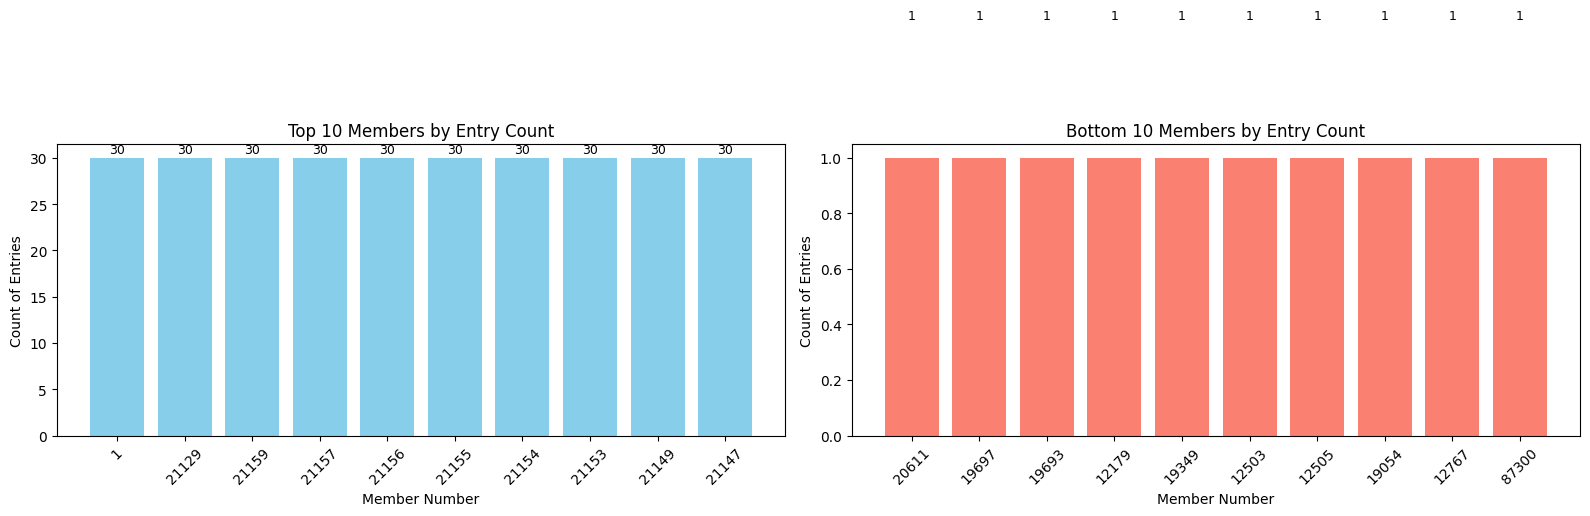

In [17]:
import matplotlib.pyplot as plt

# Get top and bottom 10 members by entry count
member_counts = df['Mem No'].value_counts()
top_10 = member_counts.head(10)
bottom_10 = member_counts.tail(10)

# --- Plotting ---
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 Plot
axs[0].bar(top_10.index.astype(str), top_10.values, color='skyblue')
axs[0].set_title("Top 10 Members by Entry Count")
axs[0].set_xlabel("Member Number")
axs[0].set_ylabel("Count of Entries")
axs[0].tick_params(axis='x', rotation=45)

# Annotate bars
for i, v in enumerate(top_10.values):
    axs[0].text(i, v + 0.5, str(v), ha='center', fontsize=9)

# Bottom 10 Plot
axs[1].bar(bottom_10.index.astype(str), bottom_10.values, color='salmon')
axs[1].set_title("Bottom 10 Members by Entry Count")
axs[1].set_xlabel("Member Number")
axs[1].set_ylabel("Count of Entries")
axs[1].tick_params(axis='x', rotation=45)

# Annotate bars
for i, v in enumerate(bottom_10.values):
    axs[1].text(i, v + 0.5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()
